In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
data = pd.read_csv("data/car data.csv")

In [3]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [5]:
data.drop(['Car_Name'], axis =1, inplace = True)


In [6]:
data = pd.get_dummies(data, drop_first=True)

In [7]:
data['current'] =2020

In [8]:
data['No_of_Year'] = data['current'] - data['Year']

In [9]:

data.drop(['current', 'Year'], axis =1, inplace = True)


In [10]:
data.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual,No_of_Year
0,3.35,5.59,27000,0,0,1,0,1,6
1,4.75,9.54,43000,0,1,0,0,1,7
2,7.25,9.85,6900,0,0,1,0,1,3
3,2.85,4.15,5200,0,0,1,0,1,9
4,4.60,6.87,42450,0,1,0,0,1,6


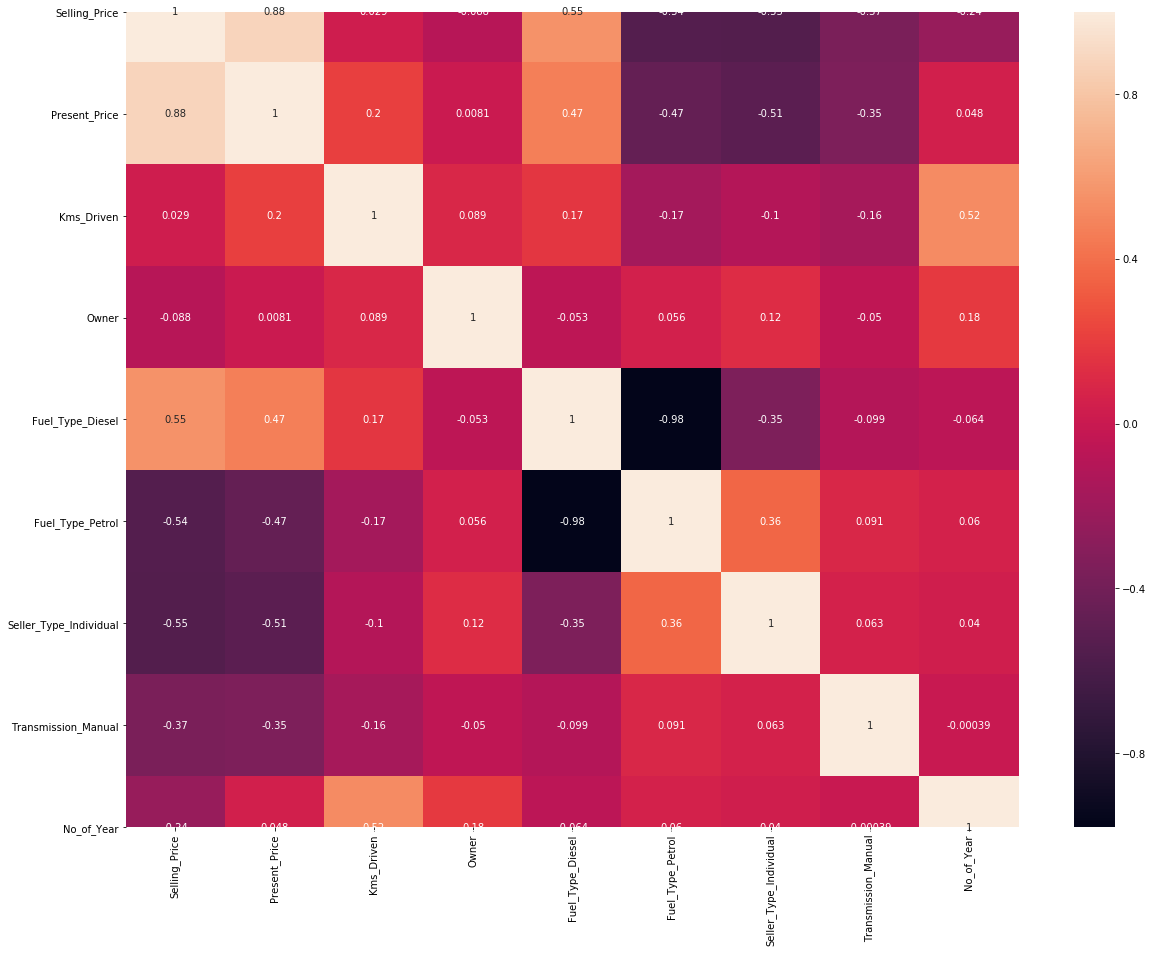

In [11]:
plt.figure(figsize=(20,15))
sns.heatmap(data.corr(), annot =True)

In [12]:
X= data.iloc[:, 1:]
y = data.iloc[:, 0]
X.head()

,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual,No_of_Year
0,5.59,27000,0,0,1,0,1,6
1,9.54,43000,0,1,0,0,1,7
2,9.85,6900,0,0,1,0,1,3
3,4.15,5200,0,0,1,0,1,9
4,6.87,42450,0,1,0,0,1,6


In [13]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()

In [14]:
#####Feature importance
model.fit(X,y)
print(model.feature_importances_)


[3.11158538e-01 2.75584376e-02 1.77161611e-04 2.79191512e-01
 9.81388783e-05 1.25807980e-01 1.75171321e-01 8.08369118e-02]


c:\users\reshikesh\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train,X_test, y_train,y_test = train_test_split(X,y, test_size = 0.2)

In [17]:
from sklearn.ensemble import RandomForestRegressor

In [18]:
regressor =  RandomForestRegressor()

In [19]:
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 1500, num = 30)]
print(n_estimators)

[50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000, 1050, 1100, 1150, 1200, 1250, 1300, 1350, 1400, 1450, 1500]


In [20]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 50, stop = 1500, num = 30)]

max_features = ['auto', 'sqrt']

max_depth = [int(x) for x in np.linspace(5, 50, num = 6)]

min_samples_split = [2, 4, 5, 8, 10, 12, 15, 40, 80, 100]

min_samples_leaf = [1, 2, 5, 10]

In [21]:

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)
rf = RandomForestRegressor()

{'n_estimators': [50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000, 1050, 1100, 1150, 1200, 1250, 1300, 1350, 1400, 1450, 1500], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 14, 23, 32, 41, 50], 'min_samples_split': [2, 4, 5, 8, 10, 12, 15, 40, 80, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [22]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [23]:
rf_random.fit(X_train,y_train)
rf_random.score(X_test, y_test)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=550, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=32 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=550, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=32, total=   0.4s
[CV] n_estimators=550, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=32 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV]  n_estimators=550, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=32, total=   0.4s
[CV] n_estimators=550, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=32 
[CV]  n_estimators=550, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=32, total=   0.4s
[CV] n_estimators=550, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=32 
[CV]  n_estimators=550, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=32, total=   0.4s
[CV] n_estimators=550, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=32 
[CV]  n_estimators=550, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=32, total=   0.5s
[CV] n_estimators=1050, min_samples_split=80, min_samples_leaf=5, max_features=auto, max_depth=5 
[CV]  n_estimators=1050, min_samples_split=80, min_samples_leaf=5, max_features=auto, max_depth=5, total=   0.7s
[CV] n_estimators=1050, min_samples_split=80, min_

[CV]  n_estimators=1300, min_samples_split=80, min_samples_leaf=1, max_features=sqrt, max_depth=23, total=   0.9s
[CV] n_estimators=1300, min_samples_split=80, min_samples_leaf=1, max_features=sqrt, max_depth=23 
[CV]  n_estimators=1300, min_samples_split=80, min_samples_leaf=1, max_features=sqrt, max_depth=23, total=   0.7s
[CV] n_estimators=1300, min_samples_split=80, min_samples_leaf=1, max_features=sqrt, max_depth=23 
[CV]  n_estimators=1300, min_samples_split=80, min_samples_leaf=1, max_features=sqrt, max_depth=23, total=   0.6s
[CV] n_estimators=1300, min_samples_split=80, min_samples_leaf=1, max_features=sqrt, max_depth=23 
[CV]  n_estimators=1300, min_samples_split=80, min_samples_leaf=1, max_features=sqrt, max_depth=23, total=   0.8s
[CV] n_estimators=1300, min_samples_split=80, min_samples_leaf=1, max_features=sqrt, max_depth=23 
[CV]  n_estimators=1300, min_samples_split=80, min_samples_leaf=1, max_features=sqrt, max_depth=23, total=   0.6s
[CV] n_estimators=850, min_samples

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   21.1s finished


-2.4485570020539447

In [24]:
predictions = rf_random.predict(X_test)

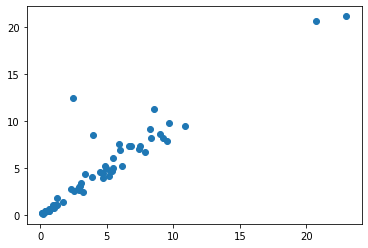

In [25]:
plt.scatter(y_test, predictions)

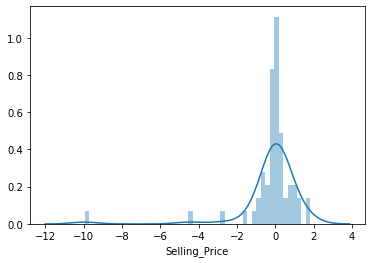

In [26]:
sns.distplot( y_test - predictions)

In [27]:
file = open("RandomForestRegressor.pkl", 'wb')
pickle.dump(rf_random, file)

In [28]:
data.columns

Index(['Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner',
       'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Seller_Type_Individual',
       'Transmission_Manual', 'No_of_Year'],
      dtype='object')

In [29]:

rf_random


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_sta...


In [30]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.6893691346523975
MSE: 2.4485570020539447
RMSE: 1.5647865675720585


In [31]:
rf_random.best_params_

{'n_estimators': 550,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 32}

In [32]:
data.head()
rf_random.predict([[7.0, 50000, 1, 1, 0, 0, 1, 2]])

array([4.59891918])

In [33]:
rf_random.score(X_test, y_test)

-2.4485570020539447